In [90]:
# Importing the library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt # plotting library
from IPython.display import display # Manage multiple output per cell

In [91]:
# Manage UTF-8 issue
import sys  
reload(sys)  
sys.setdefaultencoding('utf8')

In [158]:
# Importing and cleaning the dataset
df = pd.read_csv("../../data/result/D1-data-model-bet2.csv")
# hot-encoding
df = pd.get_dummies(df)
# remove useless column
df.drop(df.columns[[8, 9, 10, 13, 14]], axis=1, inplace=True)
# Create a win column containing the gain if bet was good
df['win'] = df['BetA']-1
df.loc[df.TrueResult_A == 0, 'win'] = 0
# Removing column where bet is too high
df = df.drop(df[df.BetA < 2].index)
df = df.drop(df[df.BetA > 4].index)
df.head()

,HomeVictory,HomeDefeat,HomeDraw,HomeGoal,ExtVictory,ExtDefeat,ExtDraw,ExtGoal,BetA,TrueResult_A,win
2,0.666667,0.000000,0.333333,2.333333,0.000000,0.666667,0.333333,1.666667,2.9,1,1.9
7,0.000000,0.000000,1.000000,1.000000,0.333333,0.333333,0.333333,3.000000,2.6,1,1.6
8,1.000000,0.000000,0.000000,3.333333,0.333333,0.000000,0.666667,1.666667,3.4,0,0.0
11,0.000000,0.333333,0.666667,1.333333,0.333333,0.666667,0.000000,1.000000,3.0,1,2.0
12,0.333333,0.333333,0.333333,2.333333,0.000000,0.666667,0.333333,1.000000,2.9,1,1.9


In [159]:
# Get the X and y
X = df[df.columns.drop(['BetA', 'TrueResult_A', 'win'])]
y = df['TrueResult_A'].astype('bool_')
win = df['win']
# display(X, y, win)

In [160]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [161]:
y_train.value_counts()

False    178
True      83
Name: TrueResult_A, dtype: int64

In [162]:
y_test.value_counts()

False    79
True     33
Name: TrueResult_A, dtype: int64

In [97]:
# Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.fit_transform(X_test)

# Random Forest

In [166]:
# Importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=0)

In [164]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
f1_score = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=4, n_jobs=-1, scoring='f1')
display('f1_score:',f1_score.mean(), f1_score.std())

'f1_score:'

0.18697729988052569

0.13101245052509006

In [165]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
f1_score = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=4, n_jobs=-1, scoring='f1')
display('f1_score:',f1_score.mean(), f1_score.std())

'f1_score:'

0.18697729988052569

0.13101245052509006

In [167]:
# Applying Grid Search to find the best hyper-parameters for our Logistic Regression Model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.classification import log_loss
from sklearn.metrics import make_scorer
parameters = [{'n_estimators': [3, 10, 30, 100, 300, 1000], 
                'criterion': ['gini', 'entropy'], 
                'max_features': ['sqrt', 'log2', None]
               },
              {'n_estimators': [3, 10, 30, 100, 300, 1000], 
                'criterion': ['gini', 'entropy'], 
                'max_features': [3,5,7]
               }]
clf = GridSearchCV(estimator=classifier,
                   param_grid=parameters,
                   scoring='f1',
                   cv=4,
                   n_jobs=-1)
clf.fit(X_train, y_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'n_estimators': [3, 10, 30, 100, 300, 1000], 'max_features': ['sqrt', 'log2', None], 'criterion': ['gini', 'entropy']}, {'n_estimators': [3, 10, 30, 100, 300, 1000], 'max_features': [3, 5, 7], 'criterion': ['gini', 'entropy']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [168]:
# Extract best score calculated with the GridSearchCV
best_score = clf.best_score_
best_score

0.40035518675685106

In [169]:
# Extract best hyper-parameter calculated with the GridSearchCV
best_params = clf.best_params_
best_params

{'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 3}

In [148]:
# Evaluating scoring parameters
from sklearn.model_selection import cross_val_score
# Accuracy
#accuracy_score = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=4, n_jobs=-1, scoring='accuracy')
#display('accuracy_score:',accuracy_score.mean(), accuracy_score.std())
# precision
precision_score = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=4, n_jobs=-1, scoring='precision')
display('precision_score:',precision_score.mean(), precision_score.std())
# recall
recall_score = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=4, n_jobs=-1, scoring='recall')
display('recall_score:',recall_score.mean(), recall_score.std())
# f1
f1_score = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=4, n_jobs=-1, scoring='f1')
display('f1_score:',f1_score.mean(), f1_score.std())
# Cross entropy
#from sklearn.metrics.classification import log_loss
#log_loss_score = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=4, n_jobs=-1, scoring=make_scorer(log_loss, greater_is_better=False))
#display('log_loss_score:',log_loss_score.mean(), log_loss_score.std())

'precision_score:'

0.49562198067632851

0.068430658025602734

'recall_score:'

0.4433333333333333

0.017118865486811765

'f1_score:'

0.46589456539666829

0.030751637305352034

In [170]:
# Training a new classifier using the best hyper-parameters
clf = RandomForestClassifier(n_estimators=best_params['n_estimators'], 
                             criterion=best_params['criterion'], 
                             max_features=best_params['max_features'], 
                             random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=3, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [171]:
# Predicting the Test set result
y_pred = clf.predict(X_test)
y_pred

array([False,  True, False, False, False, False, False,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False,  True,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False,  True, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False,  True,  True,  True, False,  True, False, False,
        True, False, False,  True, False, False, False,  True, False,
       False, False, False, False], dtype=bool)

In [172]:
# Calculate target classification probability (got % instead of 1 or 0)
y_probs = clf.predict_proba(X_test)
y_probs

array([[ 1.        ,  0.        ],
       [ 0.33333333,  0.66666667],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 0.66666667,  0.33333333],
       [ 1.        ,  0.        ],
       [ 0.66666667,  0.33333333],
       [ 0.33333333,  0.66666667],
       [ 0.66666667,  0.33333333],
       [ 1.        ,  0.        ],
       [ 0.66666667,  0.33333333],
       [ 0.66666667,  0.33333333],
       [ 0.33333333,  0.66666667],
       [ 1.        ,  0.        ],
       [ 0.66666667,  0.33333333],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 0.66666667,  0.33333333],
       [ 0.66666667,  0.33333333],
       [ 1.        ,  0.        ],
       [ 0.66666667,  0.33333333],
       [ 0.        ,  1.        ],
       [ 0.66666667,  0.33333333],
       [ 1.        ,  0.        ],
       [ 0.66666667,  0.33333333],
       [ 0.66666667,  0.33333333],
       [ 1.        ,

In [173]:
# Making the confusion Matrix
df_confusion = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
df_confusion

Predicted,False,True,All
Actual,,,
False,62,17,79
True,26,7,33
All,88,24,112


In [174]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='binary') 

(0.29166666666666669, 0.21212121212121213, 0.24561403508771931, None)

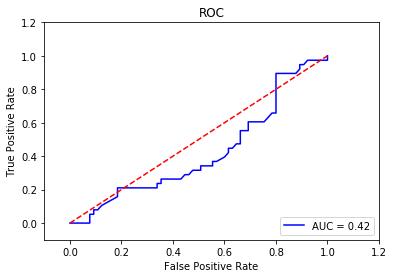

In [155]:
# Plot of a ROC curve
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test.ravel(), y_probs[:, 1].ravel())
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Check Important Feature
list(zip(df.columns.drop('isSelling'), clf.feature_importances_))